## Installing Segyio library 

In [1]:
!pip install segyio


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import segyio
from scipy.signal import hilbert

## Code to Extract Trace headers

In [3]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),columns=headers.keys())
    
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
        
    return df

## Opening Segy file and Extracting Header information and Trace data

In [4]:
# Name of the seismic file
filename='Seismic_data.sgy' # Enter the file name within the quotes

# Opening the file
with segyio.open(filename, ignore_geometry=True) as f:
    
    # Extracting basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    Total_time=sample_rate/1000*n_samples
    print('Number of traces : ',n_traces,' sample rate : ',sample_rate,' ms',' Number of samples : ',n_samples)
    print('Total time of the seismic trace : ',Total_time,' s')
    
    twt = f.samples
    
    # Extracting Raw Data
    data = f.trace.raw[:]
    
    # Extracting Trace Header Information
    trace_headers = parse_trace_headers(f, n_traces)

Number of traces :  600515  sample rate :  4.0  ms  Number of samples :  462
Total time of the seismic trace :  1.848  s


## Viewing the Trace Header File

In [5]:
pd.set_option('display.max_columns', 500)
trace_headers.describe()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,DataUse,offset,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverDatumElevation,SourceDatumElevation,SourceWaterDepth,GroupWaterDepth,ElevationScalar,SourceGroupScalar,SourceX,SourceY,GroupX,GroupY,CoordinateUnits,WeatheringVelocity,SubWeatheringVelocity,SourceUpholeTime,GroupUpholeTime,SourceStaticCorrection,GroupStaticCorrection,TotalStaticApplied,LagTimeA,LagTimeB,DelayRecordingTime,MuteTimeStart,MuteTimeEND,TRACE_SAMPLE_COUNT,TRACE_SAMPLE_INTERVAL,GainType,InstrumentGainConstant,InstrumentInitialGain,Correlated,SweepFrequencyStart,SweepFrequencyEnd,SweepLength,SweepType,SweepTraceTaperLengthStart,SweepTraceTaperLengthEnd,TaperType,AliasFilterFrequency,AliasFilterSlope,NotchFilterFrequency,NotchFilterSlope,LowCutFrequency,HighCutFrequency,LowCutSlope,HighCutSlope,YearDataRecorded,DayOfYear,HourOfDay,MinuteOfHour,SecondOfMinute,TimeBaseCode,TraceWeightingFactor,GeophoneGroupNumberRoll1,GeophoneGroupNumberFirstTraceOrigField,GeophoneGroupNumberLastTraceOrigField,GapSize,OverTravel,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPoint,ShotPointScalar,TraceValueMeasurementUnit,TransductionConstantMantissa,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
count,600515.000000,600515.000000,600515.000000,600515.0,600515.000000,600515.000000,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,6.005150e+05,6.005150e+05,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,6.005150e+05,6.005150e+05,600515.000000,600515.000000,600515.000000,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0,600515.0
mean,467.042392,300258.000000,415.694181,0.0,783.783722,783.783722,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,6.177050e+06,6.081783e+07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,4.0,0.0,0.0,462.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.177050e+06,6.081783e+07,415.694181,783.783722,300258.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,273.254650,173353.892789,183.081383,0.0,273.167295,273.167295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.820752e+04,4.589490e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.820752e+04,4.589490e+04,183.081383,273.167295,173353.892789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,100.000000,0.0,300.000000,300.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,6.054167e+06,6.073556e+07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,4.0,0.0,0.0,462.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.054167e+06,6.073556e+07,100.000000,300.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,231.000000,150129.500000,257.000000,0.0,549.000000,549.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,6.118526e+06,6.077821e+07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0

In [6]:
trace_headers.head(10)

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,DataUse,offset,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverDatumElevation,SourceDatumElevation,SourceWaterDepth,GroupWaterDepth,ElevationScalar,SourceGroupScalar,SourceX,SourceY,GroupX,GroupY,CoordinateUnits,WeatheringVelocity,SubWeatheringVelocity,SourceUpholeTime,GroupUpholeTime,SourceStaticCorrection,GroupStaticCorrection,TotalStaticApplied,LagTimeA,LagTimeB,DelayRecordingTime,MuteTimeStart,MuteTimeEND,TRACE_SAMPLE_COUNT,TRACE_SAMPLE_INTERVAL,GainType,InstrumentGainConstant,InstrumentInitialGain,Correlated,SweepFrequencyStart,SweepFrequencyEnd,SweepLength,SweepType,SweepTraceTaperLengthStart,SweepTraceTaperLengthEnd,TaperType,AliasFilterFrequency,AliasFilterSlope,NotchFilterFrequency,NotchFilterSlope,LowCutFrequency,HighCutFrequency,LowCutSlope,HighCutSlope,YearDataRecorded,DayOfYear,HourOfDay,MinuteOfHour,SecondOfMinute,TimeBaseCode,TraceWeightingFactor,GeophoneGroupNumberRoll1,GeophoneGroupNumberFirstTraceOrigField,GeophoneGroupNumberLastTraceOrigField,GapSize,OverTravel,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D,ShotPoint,ShotPointScalar,TraceValueMeasurementUnit,TransductionConstantMantissa,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,100,0,300,300,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058355,60735564,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058355,60735564,100,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,100,0,301,301,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058605,60735571,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058605,60735571,100,301,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,100,0,302,302,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6058855,60735578,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6058855,60735578,100,302,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,100,0,303,303,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059105,60735585,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059105,60735585,100,303,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,5,100,0,304,304,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059355,60735592,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059355,60735592,100,304,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,6,100,0,305,305,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059605,60735599,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059605,60735599,100,305,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,7,100,0,306,306,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6059855,60735606,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6059855,60735606,100,306,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,8,100,0,307,307,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6060104,60735613,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6060104,60735613,100,307,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,9,100,0,308,308,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6060354,60735620,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6060354,60735620,100,308,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,10,10,100,0,309,309,0,1,0,0,1,0,0,0,0,0,0,0,0,0,-10,6060604,60735627,0,0,1,0,0,0,0,0,0,0,-4,0,4,0,0,462,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6060604,60735627,100,309,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Extracting Inlines and Crosslines

In [7]:
# Blank arrays to store inline and crossline numbers
INLINES=[]
XLINES=[]

# Extracting Inline numbers
for i in trace_headers.INLINE_3D:
    if(i not in INLINES):
        INLINES.append(i)

# Extracting Crossline numbers
for i in trace_headers.CROSSLINE_3D:
    if(i not in XLINES):
        XLINES.append(i)
        
XLINES=np.sort(XLINES)
INLINES=np.sort(INLINES)


print('Inline Information')
print('Number of Inlines : ',len(INLINES))
print('Starting : ',INLINES[0],' Ending : ',INLINES[-1])

print('CrossLine Information')
print('Number of crosslines : ',len(XLINES))
print('Starting : ',XLINES[0],' Ending : ',XLINES[-1])

Inline Information
Number of Inlines :  651
Starting :  100  Ending :  750
CrossLine Information
Number of crosslines :  951
Starting :  300  Ending :  1250


## Viewing an Inline

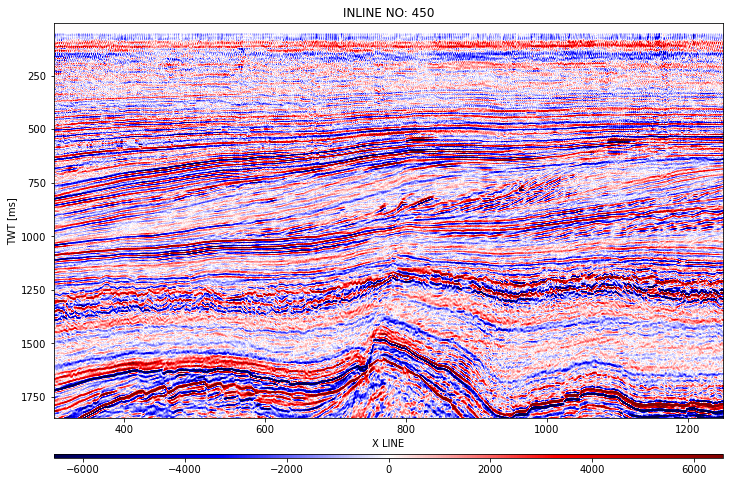

In [8]:
# Providing Inline number
INLINE_NUM=450

# Finding the trace numbers present in that inline
trace_nums=np.where(np.asarray(trace_headers.INLINE_3D)==INLINE_NUM)[0]

# Finding the Crosslines present in that inline 
xlines=np.array(trace_headers.CROSSLINE_3D[trace_nums[0]:trace_nums[-1]+1])

# Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

# Estimating starting and ending crosslines
s=xlines[0]
e=xlines[-1]

# clip_percentile for beter contrast taking 99 percentile of the values as max and min scale for the colorbar
clip_percentile = 99
vm = np.percentile(data, clip_percentile)

extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(data.T[:,trace_nums[0]:trace_nums[-1]], cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)

ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='1%', pad=0.5)

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

## Seismic Attributes

Some of the Seismic Attributes we are going to find here are:

1) Hilbert Amplitude 
2) Envelope 
3) Instantaneous Phase 
4) Instantaneous Frequency 
5) Sweetness 

Hilbert Amplitude : It can be found by applying hilbert transform on seismic data to form analytic function. The complex part of the analytic function created gives the Hilbert Amplitude.


Envelope : The absolute value of the analytic function gives the Envelope.

Instantaneous phase : It is the ratio of the imaginary and real component of Analytic function.

Instantaneous Frequency : It is the derivative of the Instantaneous phase with time.

Sweetness : It is the ratio of Envelope and square root of Instantaneous frequency. It is used to identify thick clean reservoirs.

## Extracting Seimic Attributes from a Seismic trace

In [9]:
# Providing trace number
trace_num=12000

# Computing the Analytic function from seismic traces 
analytic_signal = hilbert(data[trace_num])

# Computing Envelope
amplitude_envelope = np.abs(analytic_signal)

# Computing Instantaneous Phase
phase=np.angle(analytic_signal)

# Computing Instantaneous Frequency
instantaneous_frequency = np.abs((np.diff(np.unwrap(phase)) /(np.diff(np.linspace(0,n_samples*sample_rate*0.001,n_samples))*2.0*np.pi)))

# Computing Sweetness
sweetness=amplitude_envelope[0:-1]/(np.sqrt(instantaneous_frequency))

C:\Users\ARNABS~1\AppData\Local\Temp/ipykernel_9100/3359578227.py:17: RuntimeWarning: divide by zero encountered in true_divide
  sweetness=amplitude_envelope[0:-1]/(np.sqrt(instantaneous_frequency))


## Plotting the Attributes

Text(0, 0.5, 'Sweetness')

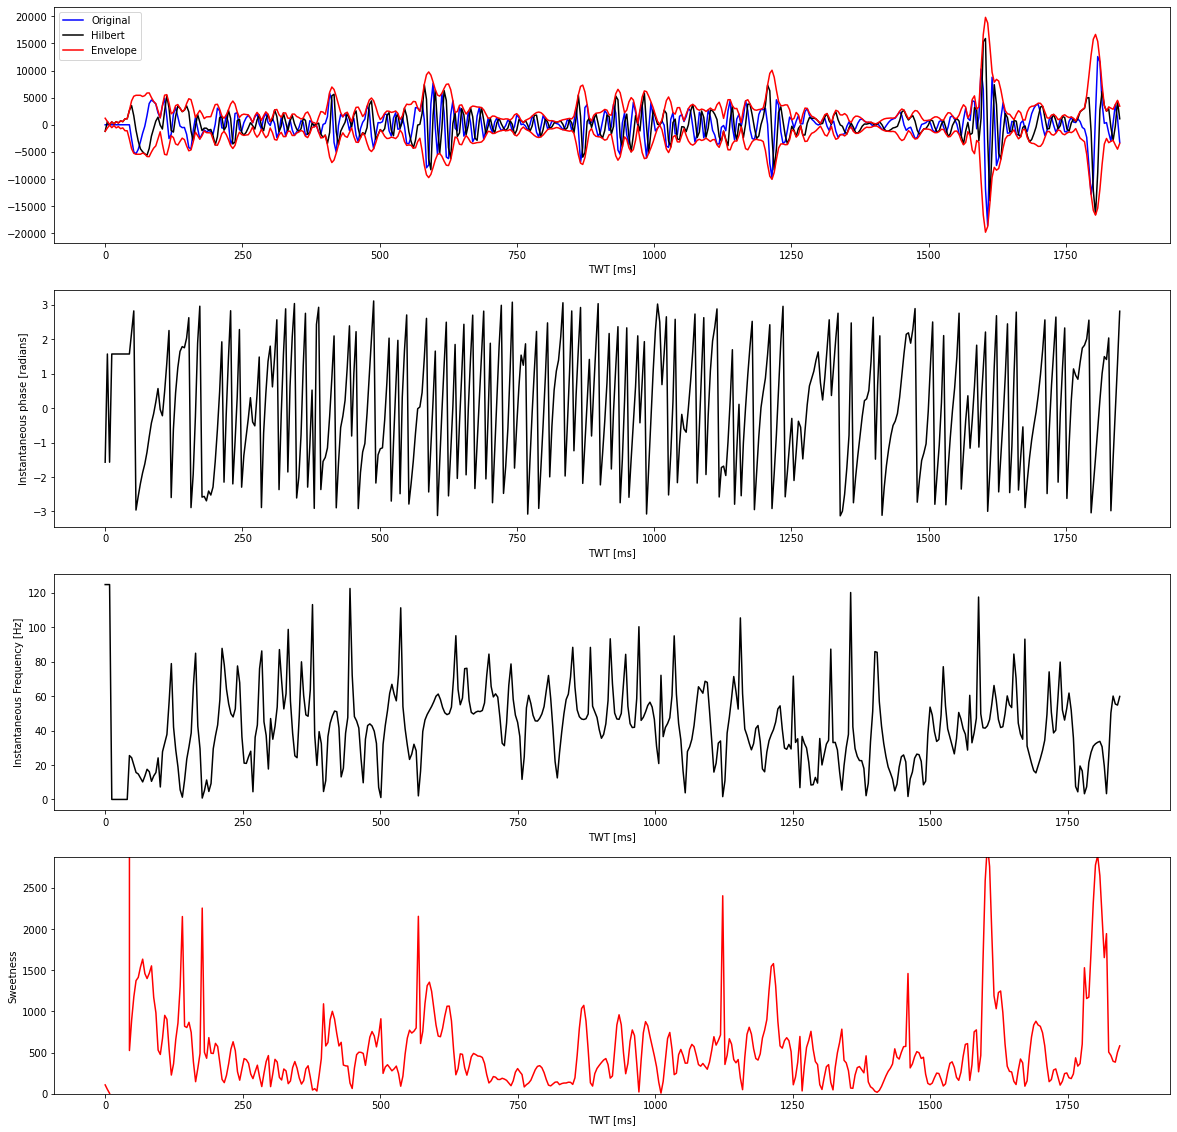

In [10]:
fig = plt.figure(figsize=(20,20))

# Amplitude and Envelope
ax = fig.add_subplot(4, 1, 1)
ax.plot(np.linspace(0,n_samples*sample_rate,n_samples),data[trace_num],'b')
ax.plot(np.linspace(0,n_samples*sample_rate,n_samples),np.imag(analytic_signal),'k')
ax.plot(np.linspace(0,n_samples*sample_rate,n_samples),amplitude_envelope,'r')
ax.plot(np.linspace(0,n_samples*sample_rate,n_samples),-amplitude_envelope,'r')
ax.set_xlabel('TWT [ms]')
ax.legend(['Original','Hilbert','Envelope'])

# Instantaneous Phase
ax = fig.add_subplot(4, 1, 2)
plt.plot(np.linspace(0,n_samples*sample_rate,n_samples),phase,'k')
ax.set_xlabel('TWT [ms]')
ax.set_ylabel('Instantaneous phase [radians]')

# Instantaneous Frequency
ax = fig.add_subplot(4, 1, 3)
plt.plot(np.linspace(0,n_samples*sample_rate,n_samples)[0:-1],instantaneous_frequency,'k')
ax.set_xlabel('TWT [ms]')
ax.set_ylabel('Instantaneous Frequency [Hz]')

# Sweetness
ax = fig.add_subplot(4, 1, 4)
plt.plot(np.linspace(0,n_samples*sample_rate,n_samples)[0:-1],sweetness,'r')
plt.ylim(0,np.percentile(sweetness, 98))
ax.set_xlabel('TWT [ms]')
ax.set_ylabel('Sweetness')

## Extracting Seismic Attributes from Inline data

In [11]:
# Providing Inline number
INLINE_NUM=450

# Finding the trace numbers present in that inline
trace_nums=np.where(np.asarray(trace_headers.INLINE_3D)==INLINE_NUM)[0]

# Finding the Crosslines present in that inline 
xlines=np.array(trace_headers.CROSSLINE_3D[trace_nums[0]:trace_nums[-1]+1])

# Extracting the inline data
inline_data=data[trace_nums[0]:trace_nums[-1],:]

# Computing the Analytic function from seismic traces 
analytic_signal = hilbert(inline_data)

# Computing Envelope
amplitude_envelope = np.abs(analytic_signal)

# Computing Instantaneous Phase
phase=np.angle(analytic_signal)

# Computing Instantaneous Frequency
instantaneous_frequency = np.abs((np.diff(np.unwrap(phase)) /(np.diff(np.linspace(0,n_samples*sample_rate*0.001,n_samples))*2.0*np.pi)))

# Computing Sweetness
sweetness=amplitude_envelope[:,0:-1]/(np.sqrt(instantaneous_frequency))

C:\Users\ARNABS~1\AppData\Local\Temp/ipykernel_9100/2666121145.py:26: RuntimeWarning: divide by zero encountered in true_divide
  sweetness=amplitude_envelope[:,0:-1]/(np.sqrt(instantaneous_frequency))


## Plotting the Attributes

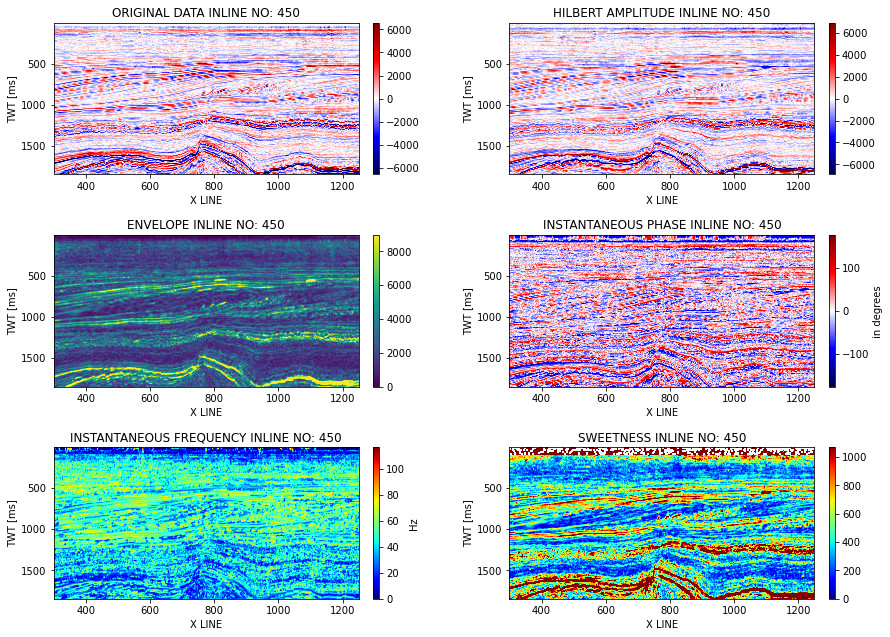

In [12]:
fig = plt.figure(figsize=(14,10))

# Estimating starting and ending crosslines
s=xlines[0]
e=xlines[-1]

# ORIGINAL DATA

ax = fig.add_subplot(3, 2, 1)
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(data.T[:,trace_nums[0]:trace_nums[-1]], cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('ORIGINAL DATA INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')


# HILBERT AMPLITUDE

ax = fig.add_subplot(3, 2, 2)
clip_percentile = 99
vm = np.percentile(np.imag(analytic_signal), clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(np.imag(analytic_signal).T, cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('HILBERT AMPLITUDE INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')


# ENVELOPE

ax = fig.add_subplot(3, 2, 3)
clip_percentile = 98
vm = np.percentile(amplitude_envelope, clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(amplitude_envelope.T, cmap="viridis", vmin=0, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('ENVELOPE INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')


# INSTANTANEOUS PHASE

ax = fig.add_subplot(3, 2, 4)
clip_percentile = 99
vm = np.percentile(57.2958*phase, clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(57.2958*phase.T, cmap="seismic", vmin=-vm, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('INSTANTANEOUS PHASE INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')
cbar=fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('in degrees', rotation=90)

# INSTANTANEOUS FREQUENCY

ax = fig.add_subplot(3, 2, 5)
clip_percentile = 99
vm = np.percentile(instantaneous_frequency, clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(instantaneous_frequency.T, cmap="jet", vmin=0, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('INSTANTANEOUS FREQUENCY INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
cbar=fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Hz', rotation=90)

# SWEETNESS

ax = fig.add_subplot(3, 2, 6)
clip_percentile = 90
vm = np.percentile(sweetness, clip_percentile)
extent = [s,e , twt[-1], twt[0]]  # define extent
im=ax.imshow(sweetness.T, cmap="jet", vmin=0, vmax=vm, aspect='auto',extent=extent)
ax.set_xlabel('X LINE')
ax.set_ylabel('TWT [ms]')
ax.set_title('SWEETNESS INLINE NO: '+str(INLINE_NUM))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.2)
cbar=fig.colorbar(im, cax=cax, orientation='vertical')

# Some parameters to display the plot properly 

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()